We will prove the Moore's law in code.

What is Moore's Law?

It says that the number of transistors per square inch on integrated circuits doubles approx every two years.




In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving moore.csv to moore.csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/moore.csv")
print(df.head())

   1971  2300
0  1972  3500
1  1973  2500
2  1973  2500
3  1974  4100
4  1974  4500


In [ ]:
df.shape

(161, 2)

In [ ]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/ingledarshan/DL_dataset/master/moore.csv"

data = pd.read_csv(url, header=None).values
print(type(data))

<class 'numpy.ndarray'>


In [ ]:
data.shape

(162, 2)

In [ ]:
X = data[:,0].reshape(-1,1)
# make it a 2D array of size NxD where D=1
print(X.shape)

# WHy are we reshaping?
# Because Tensorflow expects it in 2D format

(162, 1)


In [ ]:
Y = data[:,1]
print(Y.shape)
# We leave Y as a 1D array

(162,)


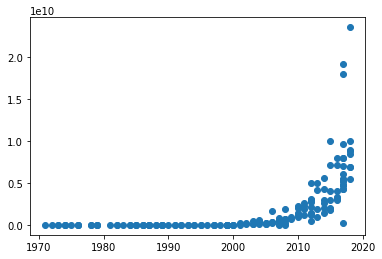

In [ ]:
# Plot the data to confirm whether it is Exponential
plt.scatter(X,Y)

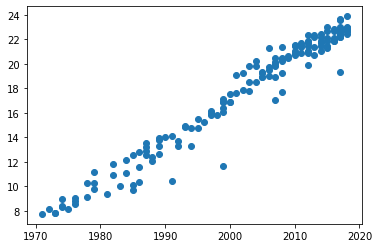

In [ ]:
# Since we want a linear model, lets take the log

Y = np.log(Y)
plt.scatter(X,Y)
# Thats Linear now

This is a good candidate for Linear Regression.

Lets do a little bit of preprocessing on it. Specifically, we are going to center X.

Why?

Because X is a year which starts aroind 1970 and end around 2018. these numbers are large values and they arent centered about zero too.

In [ ]:
X = X - X.mean()

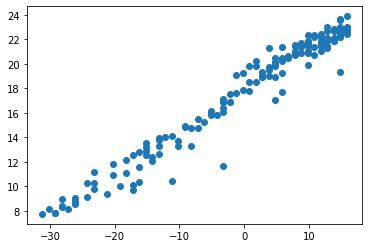

In [ ]:
plt.scatter(X,Y)

Unlike Logistic Regression, where we were doing classification, we dont need to map 'Y' to a number between 0 and 1.

In Linear Regression, the target can be any real number. Hence, we dont use any Activation Function.

Therefore, in Keras, we do use a Dense layer but we pass Activation=None or we can simply omit the argument.

Note: Activation=None is the default value.

In [ ]:
# Now create our Tensorflow Model

model = tf.keras.models.Sequential([
                                   tf.keras.layers.Input(shape=(1,)),
                                   tf.keras.layers.Dense(1)
])

Lets call model.compile() now.

SGD(learning rate, momentum)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')

In [ ]:
# Learning rate scheduler

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
# Train the model

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 343.4426
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 315.9647
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 365.2931
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 265.0986
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 217.1230
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 232.2802
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 172.9889
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 111.6982
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 65.4262
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 52.5784
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 67.1110
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 55.7105
Epoch 13/200
6/6 [=======================

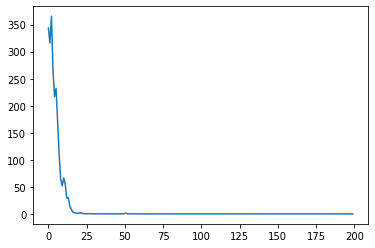

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.show()

It looks from the above graph that it has converged.

In [ ]:
# Now, lets get the trained weight of the model. to do this, we have to access the relevant layer
# Het the slope of the line
# The slope of the line is related to the doubling rate of transistor count

print(model.layers) # Note: there is only 1 layer, the 'Input' layer doesnt exist
print(model.layers[0].get_weights())

[array([[0.33999708]], dtype=float32), array([17.750727], dtype=float32)]


print(model.layers[0].get_weights()) returns two arrays, the first array represents W and the second array represents B. W is a 2D array and B is a 1D array. And the funny part is both of them just contain one number. Also, this is different from linear regression equation, where W is a vector and B is a scaler.

Reason: This is a more general version of the dense layer where we can have multiple outputs. In particular, if the input size is D and the output size is M, then

W.shape = (D, M) i.e. DxM Matrix

b.shape = (M, ) i.e. M size vector

In the above case, both the input and output are of size 1, therefore, W is a 1x1 Matrix and B is a lenght 1 Vector.

In [ ]:
type(model.layers[0].get_weights())

list

In [ ]:
# the slope of the line is:

a = model.layers[0].get_weights()[0][0,0]
print(a)

0.33999708


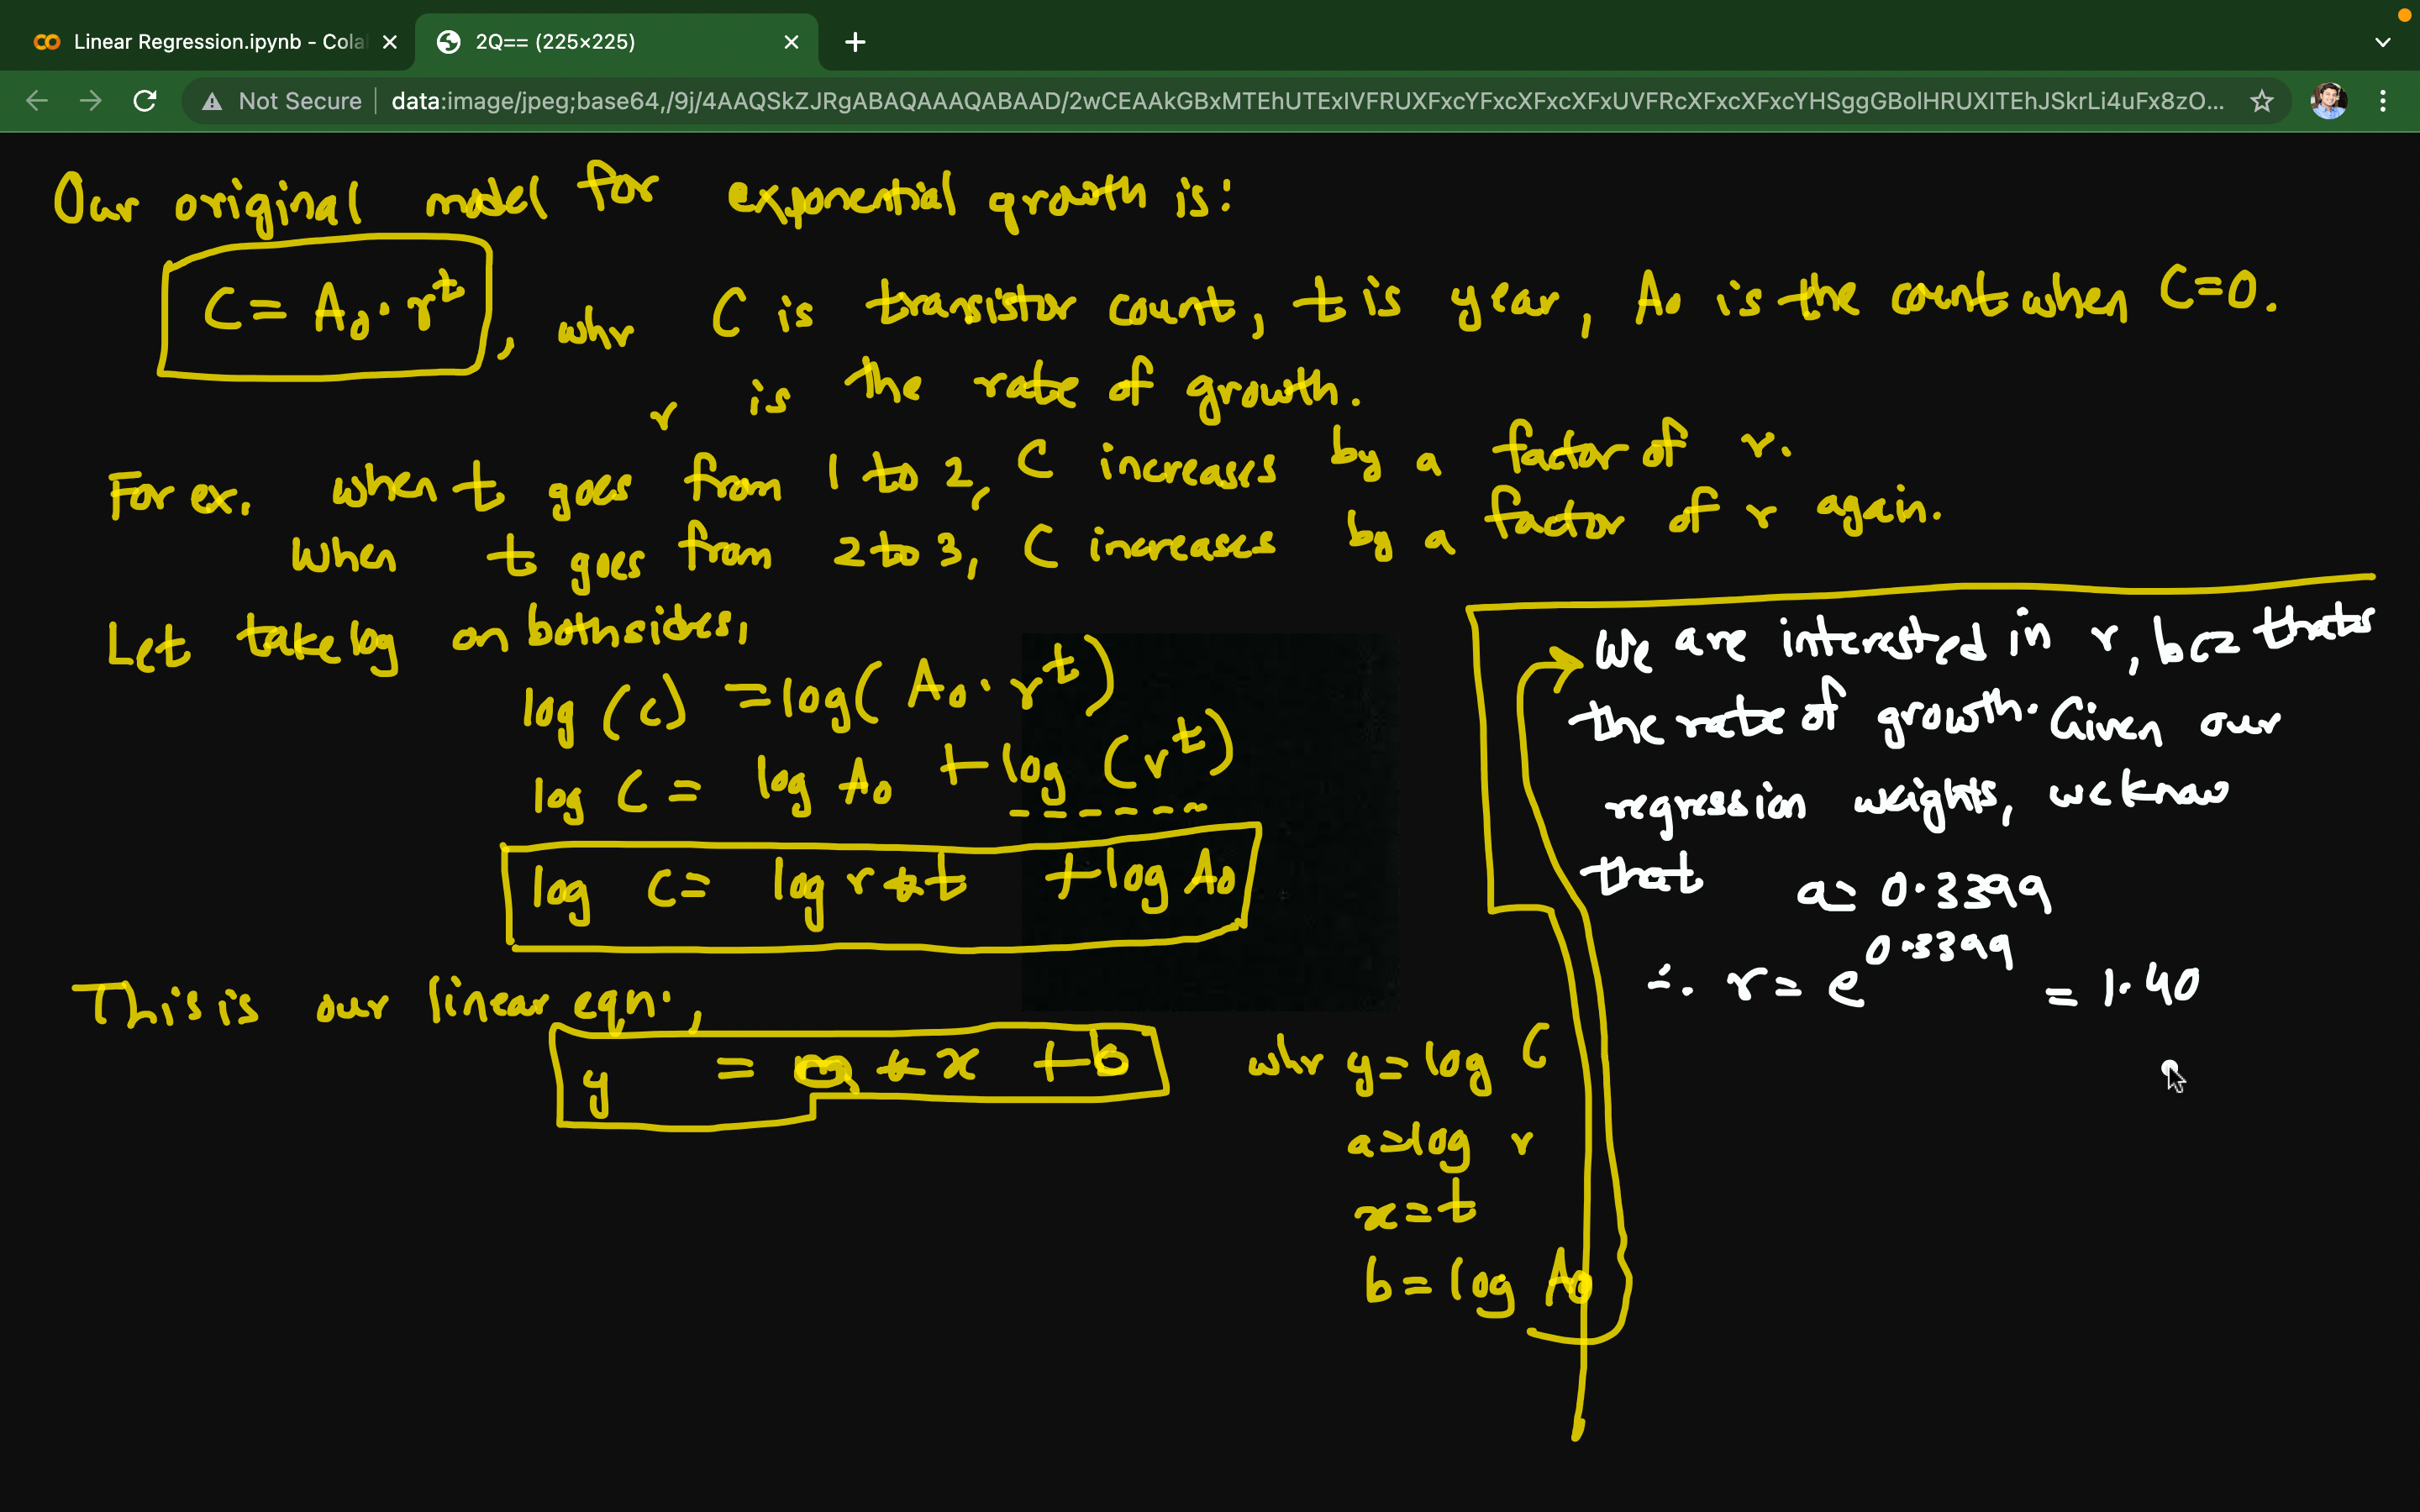

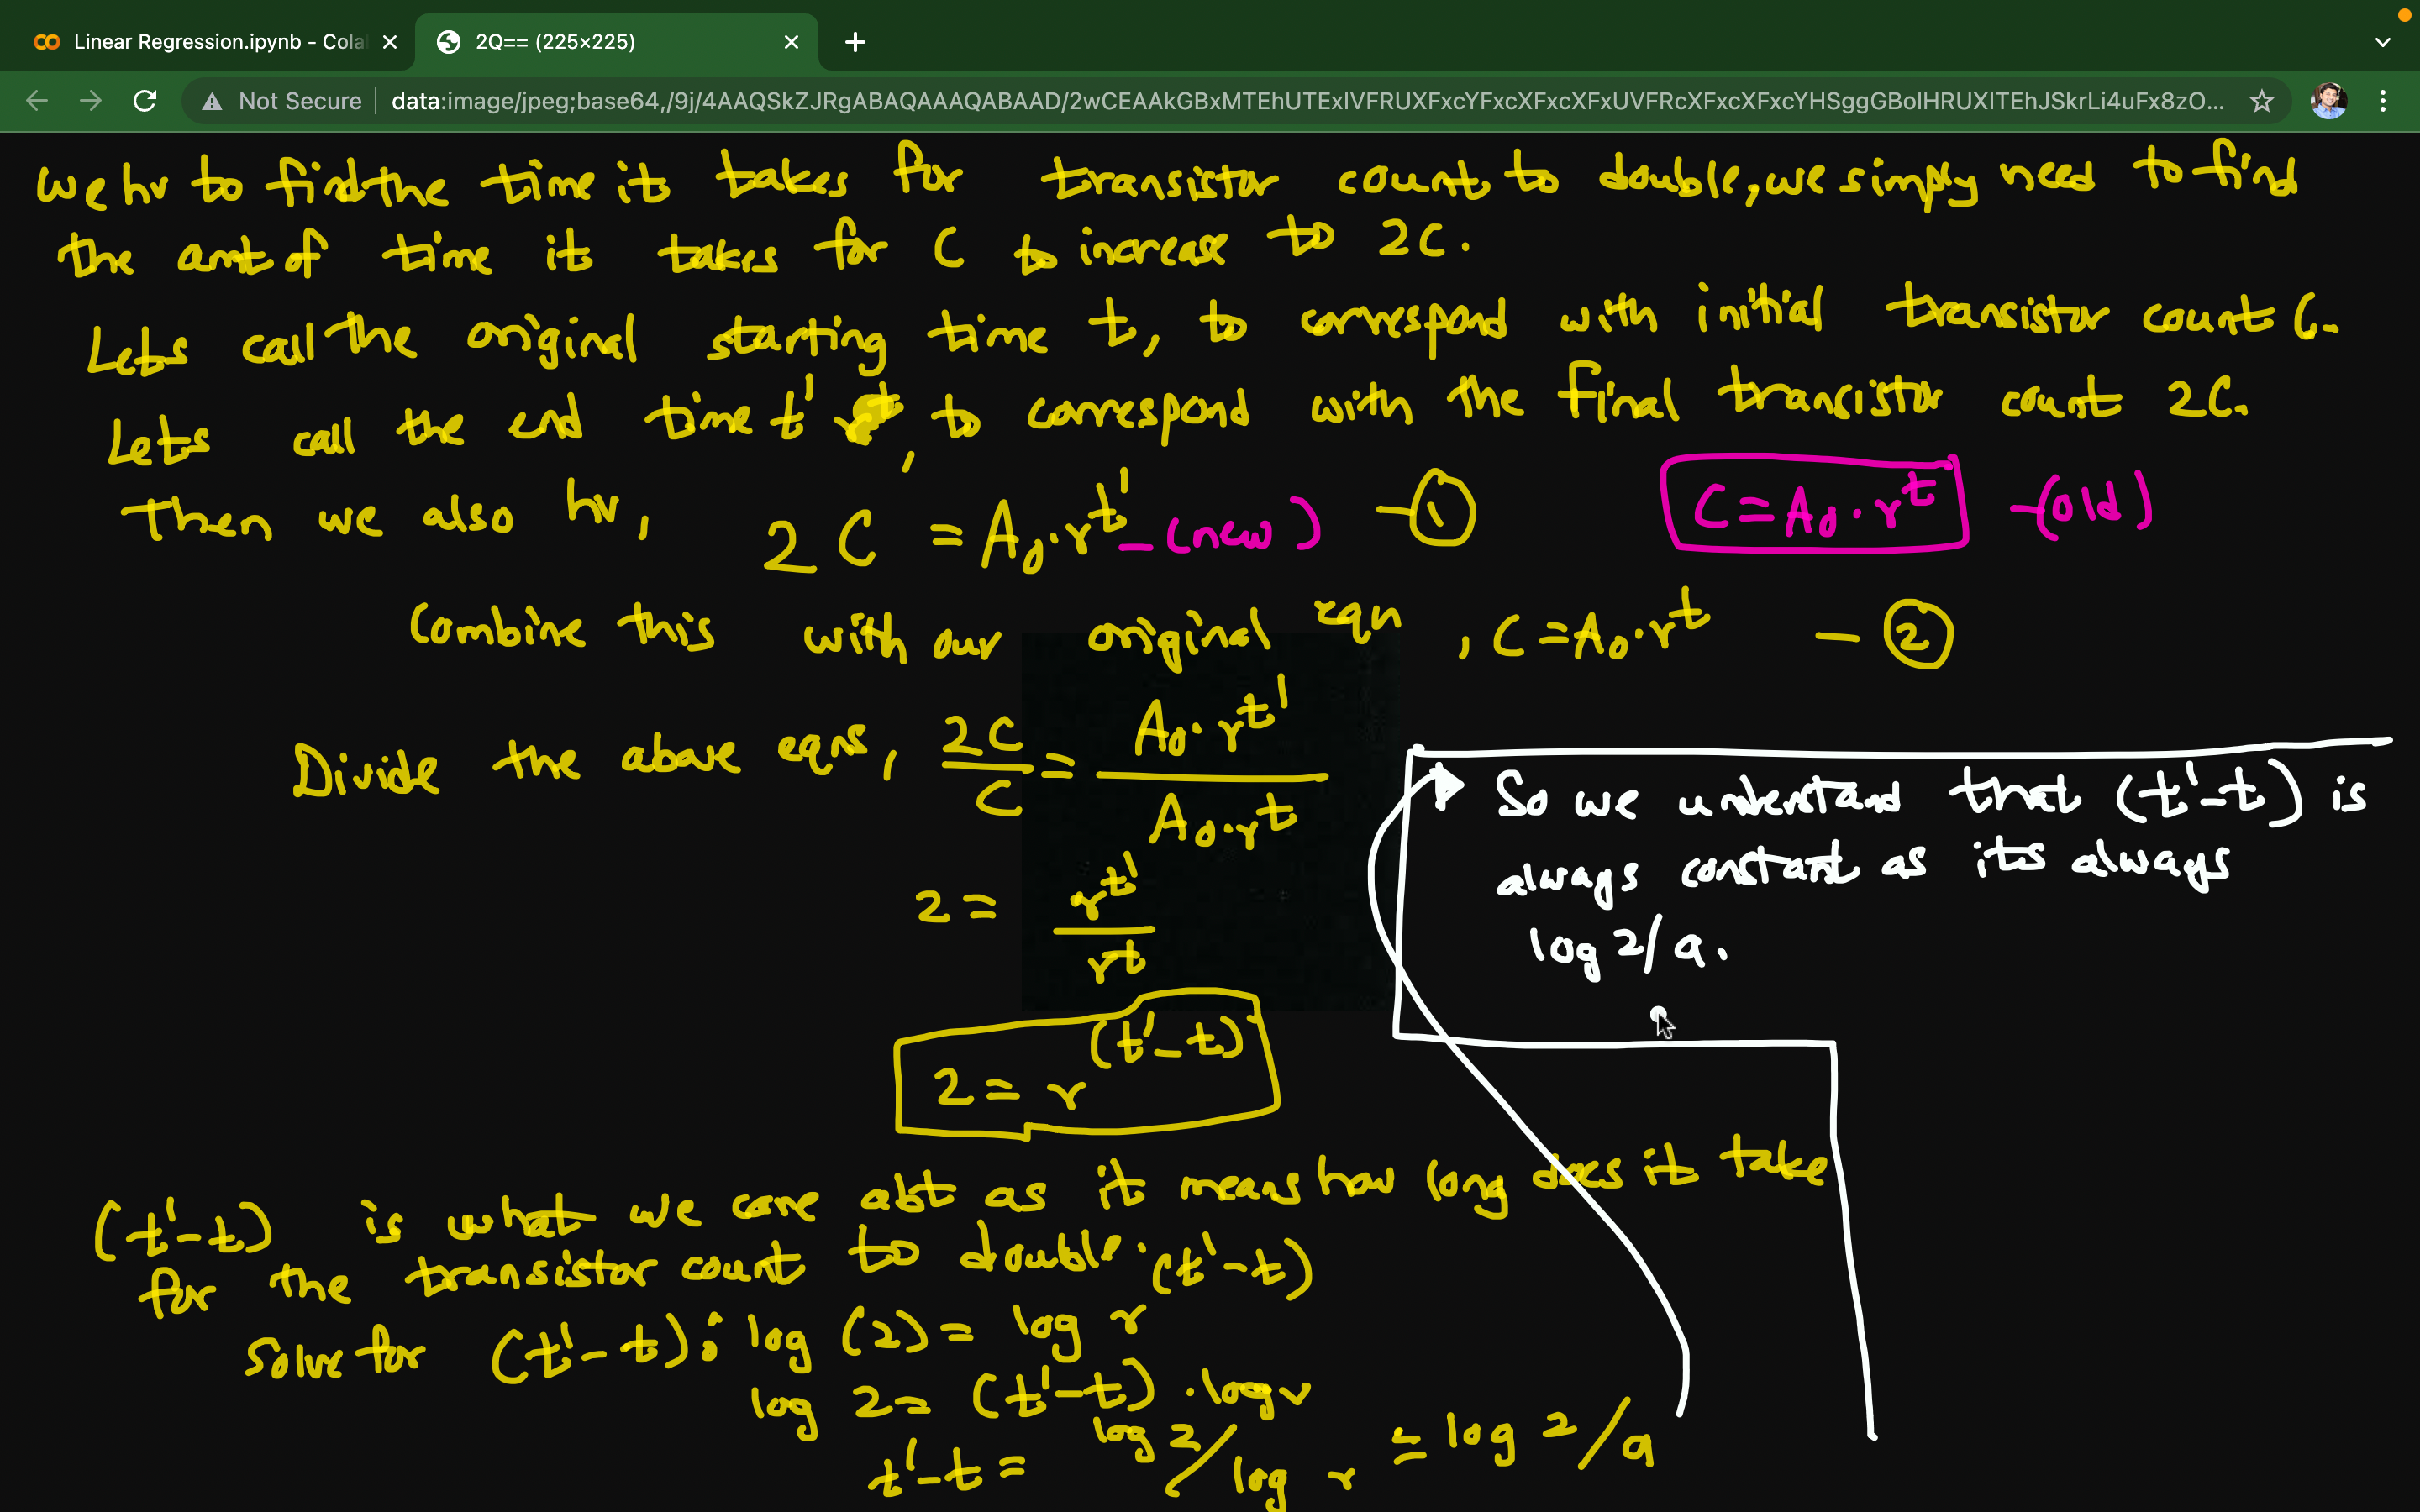

In [ ]:
print("Time to double:",np.log(2)/a)

Time to double: 2.038685669148994


Therefore, we have confirmed that the Moore's law is True as wee see above that it has doubled.

## Predictions

Note: Since the Tensorflow Dense layer has multiple outputs, it is going to return a 2D Matrix, whereas we want a 1D length vector. therefore, we need to flatten the output so that Yhat has the same shape as Y.

In [ ]:
# Dont execute this cell. this is just to understand the above mentioned point.

Yhat = model.predict(X)
print(Yhat.shape)
print(Y.shape)

(162, 1)
(162,)


In [ ]:
Yhat = model.predict(X).flatten()
print(Yhat.shape)
print(Y.shape)

(162,)
(162,)


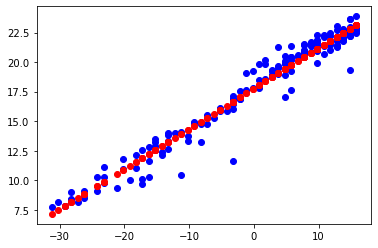

In [ ]:
plt.scatter(X, Y, color='b')
plt.scatter(X, Yhat, color='r')
plt.show()

**Observation:**

As expected, the line passes through the data points. therefore, here we have again confirmed the Moore's Law is true.

Lets go ahead: Now, let us check whether the Dense layer does the Linear transformation as expected i.e. y = w.x + b

So lets calculate the predictions manually and check if our predictions equal to the predictions we got using model.predict().

In [ ]:
# Manual Calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it earlier.
X = X.reshape(-1,1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Now we need to check if Yhat2 is equal to Yhat.

np.allclose(Yhat, Yhat2)
# allclose() is a numpy function that automatically checks the difference bwtween Yhat and Yhat2 and tells us
# whether they are same or not using a boolean True or False.
# https://www.w3resource.com/numpy/logic-functions/allclose.php

True

# Happy Learning